<a href="https://colab.research.google.com/github/xpdlaldam/nlp/blob/master/HF_audio_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
1. Background
By nature, a sound wave is a continuous signal, meaning it contains an infinite number of signal values in a given time.
This poses problems for digital devices which expect finite arrays.
To be processed, stored, and transmitted by digital devices, the continuous sound wave needs to be converted into a series of discrete values,
known as a digital representation.

2. Sampling and sampling rate
  2-1. Sampling:
    - the process of measuring the value of a continuous signal at fixed time steps. The sampled waveform is discrete, since it contains a finite number of signal values at uniform intervals.

  2-2. Sampling rate (also called sampling frequency or frequency)
    - the number of samples taken in one second and is measured in hertz (Hz)
    - how often the samples are taken
    - unit: Hz

3. Resampling
  - Since sequences are different for audio examples at different sampling rates, it will be challenging for models to generalize between sampling rates. Resampling is the process of making the sampling rates match, and is part of preprocessing the audio data.

4. Amplitude and bit depth
  4-1. Amplitude:
    - Sound is made by changes in air pressure at frequencies that are audible to humans. The amplitude of a sound describes the sound pressure level at any given instant and is measured in decibels (dB). We perceive the amplitude as loudness

  4-2. bit depth:
    - In digital audio, each audio sample records the amplitude of the audio wave at a point in time. The bit depth of the sample determines with how much precision this amplitude value can be described. The higher the bit depth, the more faithfully the digital representation approximates the original continuous sound wave

    - The most common audio bit depths are 16-bit and 24-bit. Each is a binary term, representing the number of possible steps to which the amplitude value can be quantized when it’s converted from continuous to discrete: 65,536 steps for 16-bit audio, a whopping 16,777,216 steps for 24-bit audio. Because quantizing involves rounding off the continuous value to a discrete value, the sampling process introduces noise. The higher the bit depth, the smaller this quantization noise. In practice, the quantization noise of 16-bit audio is already small enough to be inaudible, and using higher bit depths is generally not necessary

    - You may also come across 32-bit audio. This stores the samples as floating-point values, whereas 16-bit and 24-bit audio use integer samples. The precision of a 32-bit floating-point value is 24 bits, giving it the same bit depth as 24-bit audio. Floating-point audio samples are expected to lie within the [-1.0, 1.0] range. Since machine learning models naturally work on floating-point data, the audio must first be converted into floating-point format before it can be used to train the model.
"""

In [3]:
import librosa
array, sampling_rate = librosa.load(librosa.ex("trumpet"))

In [ ]:
array

In [ ]:
sampling_rate

# 2. Visualize audio

## 2-1. Waveform

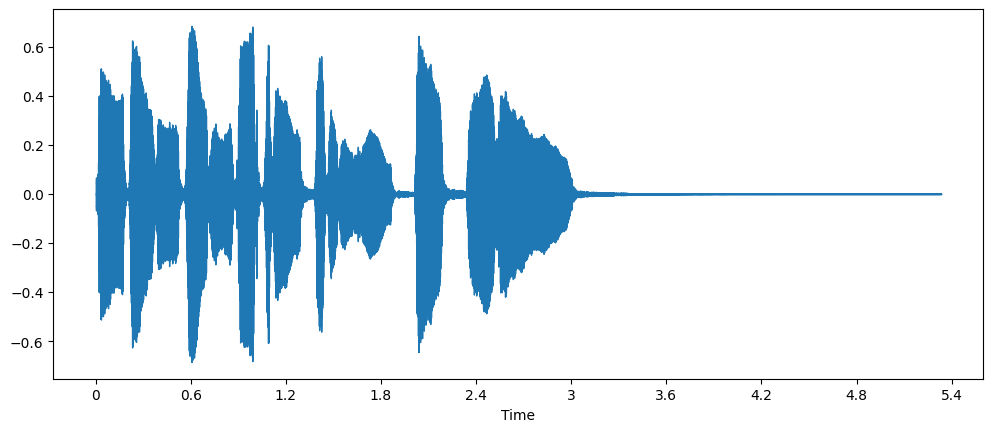

In [4]:
import matplotlib.pyplot as plt
import librosa.display

"""
y-axis: amplitude
x-axis: time
In other words, each x-axis point corresponds to a single sample value that was taken when this sound was sampled.
"""
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

## 2-2. Frequency Spectrum

In [ ]:
"""
Describes the individual frequencies that make up the signal and how strong they are.

Visualizes the amplitudes of the individual frequencies at a fixed point in time.

Amplitude (dB) vs Frequency (Hz) graph

Tip: While it is possible to plot the spectrum of the entire sound, it’s more useful to look at a small region instead. Here we’ll take the DFT over the first 4096 samples, which is roughly the length of the first note being played
"""

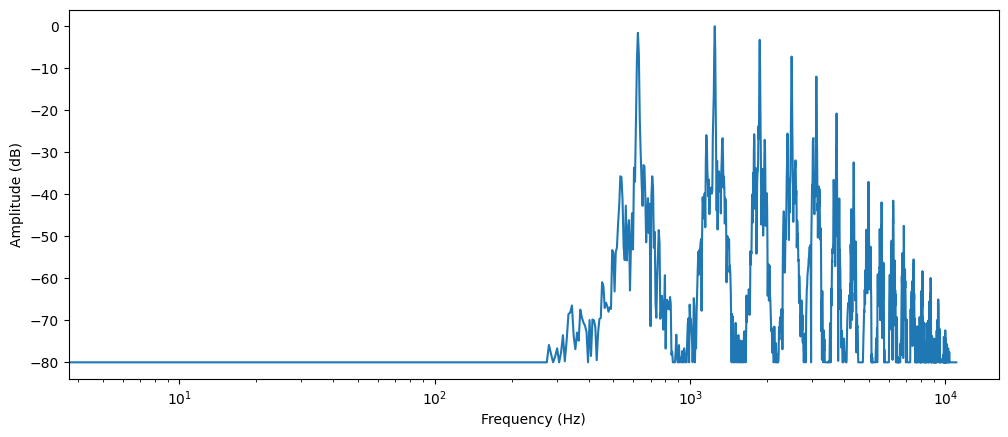

In [5]:
import numpy as np

dft_input = array[:4096]

# calculate the discrete Fourier transform (DFT)
window = np.hanning(len(dft_input))
windowed_input = dft_input * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(dft_input))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

# Challegne

In [ ]:
"""
task1: compare the Irish a sound vs American a and plot
"""